In [18]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [19]:
from langchain_groq import ChatGroq
llm = ChatGroq(model="deepseek-r1-distill-llama-70b")

In [76]:
import operator
from typing import List
from langgraph.graph.message import add_messages
from langchain_core.tools import tool
from pydantic import BaseModel , Field
from typing import TypedDict, Annotated, Sequence
from langchain_core.messages import BaseMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate, PromptTemplate
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.graph import StateGraph,MessagesState,START,END
from langgraph.prebuilt import ToolNode


In [ ]:
# def call_model(state:MessagesState):  
#     question = state["messages"][-1]
#     print(f"Question: {question}")
#     response = llm.invoke(question)
#     return {"messages": [response]}

In [33]:
def call_model(state: MessagesState):
    messages = state['messages']
    response = llm.invoke(messages)
    return {"messages": [response]}

In [34]:
call_model({"messages":"What is the capital of France?"})

{'messages': [AIMessage(content='<think>\n\n</think>\n\nThe capital of France is Paris.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 10, 'total_tokens': 22, 'completion_time': 0.088384152, 'prompt_time': 0.15891086, 'queue_time': 0.20350488100000003, 'total_time': 0.247295012}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--fd34d81d-9a2d-455d-990b-d4d797ab67c3-0', usage_metadata={'input_tokens': 10, 'output_tokens': 12, 'total_tokens': 22})]}

In [35]:
workflow=StateGraph(MessagesState)

In [36]:
workflow.add_node("mybot",call_model)

In [37]:
workflow.add_edge(START,"mybot")

In [38]:
workflow.add_edge("mybot",END)

In [39]:
app=workflow.compile()

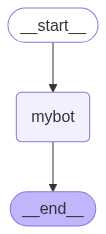

In [40]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [41]:
input={"messages":["hi hello how are you?"]}

In [42]:
app.invoke(input)

{'messages': [HumanMessage(content='hi hello how are you?', additional_kwargs={}, response_metadata={}, id='14835657-5b5a-4e9c-b2fa-28c7c5f0846f'),
  AIMessage(content="<think>\n\n</think>\n\nHello! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you with whatever you need. How are you doing? 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 9, 'total_tokens': 51, 'completion_time': 0.187713363, 'prompt_time': 0.000215147, 'queue_time': 0.203884176, 'total_time': 0.18792851}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--a3c4c2c9-c023-44aa-a296-dc13aa418687-0', usage_metadata={'input_tokens': 9, 'output_tokens': 42, 'total_tokens': 51})]}

In [43]:
for output in app.stream(input):
    for key,value in output.items():
        print(f"Output from {key} Node")
        print("_______")
        print(value)
        print("\n")

Output from mybot Node
_______
{'messages': [AIMessage(content="<think>\n\n</think>\n\nHello! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you with whatever you need. How are you doing? 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 9, 'total_tokens': 51, 'completion_time': 0.183406467, 'prompt_time': 0.000186957, 'queue_time': 0.203963997, 'total_time': 0.183593424}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--2ca84efb-2d9b-4506-a8c9-535cd90f865f-0', usage_metadata={'input_tokens': 9, 'output_tokens': 42, 'total_tokens': 51})]}




In [45]:
@tool
def search(query: str):
    """
    Search for a query and return the results.
    """
    if "delhi" in query.lower():
        return "the temperature in delhi is 45 degrees celsius"
    return "the temperature is 25 degrees celsius."

In [47]:
search.invoke("What is the temperature in mumbai?")

'the temperature is 25 degrees celsius.'

In [48]:
search.invoke("What is the temperature in delhi?")

'the temperature in delhi is 45 degrees celsius'

In [49]:
search

StructuredTool(name='search', description='Search for a query and return the results.', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x00000261BB144720>)

In [58]:
llm.invoke("what is a weather in delhi?")

AIMessage(content='<think>\n\n</think>\n\nAs of my last update in July 2024, I cannot provide real-time weather information. However, Delhi generally experiences a humid subtropical climate with extreme variations in temperature throughout the year. Here\'s a breakdown of Delhi\'s typical weather:\n\n1. **Summer (March to June)**: Extremely hot with temperatures often reaching 45°C (113°F) or higher.\n2. **Monsoon (July to September)**: Hot and humid with frequent rain showers. The temperature ranges from 25°C to 35°C (77°F to 95°F).\n3. **Winter (December to February)**: Cool to cold with temperatures as low as 2°C (36°F). Fog is common during this season.\n4. **Autumn and Spring (October to November and February to March)**: Mild and pleasant with temperatures ranging from 10°C to 25°C (50°F to 77°F).\n\nFor the most current weather information, enable your device\'s location services and use a weather app, or search for "Delhi weather" on a reliable news or meteorological website.',

In [59]:
# tools will have list of all tools that can be used in the workflow
tools = [search]

In [60]:
# Bind the tools to the LLM
llm_with_tool=llm.bind_tools(tools)

In [61]:
response = llm_with_tool.invoke("What is the temperature in delhi?")

In [62]:
response

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'vewrpdxq1', 'function': {'arguments': '{"query":"temperature in Delhi"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 81, 'prompt_tokens': 132, 'total_tokens': 213, 'completion_time': 0.349178249, 'prompt_time': 0.00845016, 'queue_time': 0.201252245, 'total_time': 0.357628409}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--ee6ee29f-ba2d-4483-95a9-f874f4de5b48-0', tool_calls=[{'name': 'search', 'args': {'query': 'temperature in Delhi'}, 'id': 'vewrpdxq1', 'type': 'tool_call'}], usage_metadata={'input_tokens': 132, 'output_tokens': 81, 'total_tokens': 213})

In [63]:
response.content

''

In [64]:
response.tool_calls

[{'name': 'search',
  'args': {'query': 'temperature in Delhi'},
  'id': 'vewrpdxq1',
  'type': 'tool_call'}]

In [65]:
def call_model(state:MessagesState):
    question=state["messages"]
    response=llm_with_tool.invoke(question)
    return {"messages":[response]}

In [66]:
input={"messages":["what is a weather in delhi?"]}


In [67]:
response=call_model(input)


In [77]:
response["messages"][-1].content


''

In [78]:
response["messages"][-1].tool_calls


[{'name': 'search',
  'args': {'query': 'weather in Delhi'},
  'id': 'p6rfqhpc2',
  'type': 'tool_call'}]

In [79]:
def router_function(state:MessagesState):
    message=state["messages"]
    last_message=message[-1]
    if last_message.tool_calls:
        return "tools"
    return END

In [80]:
tools


[StructuredTool(name='search', description='Search for a query and return the results.', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x00000261BB144720>)]

In [81]:
tool_node=ToolNode(tools)


In [82]:
tool_node

tools(tags=None, recurse=True, explode_args=False, func_accepts_config=True, func_accepts={'store': ('__pregel_store', None)}, tools_by_name={'search': StructuredTool(name='search', description='Search for a query and return the results.', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x00000261BB144720>)}, tool_to_state_args={'search': {}}, tool_to_store_arg={'search': None}, handle_tool_errors=True, messages_key='messages')

In [83]:
workflow2=StateGraph(MessagesState)

In [84]:
workflow2.add_node("llmwithtool",call_model)

workflow2.add_node("mytools",tool_node)

In [85]:
workflow2.add_edge(START,"llmwithtool")

workflow2.add_conditional_edges("llmwithtool",
                                router_function,
                                {"tools":"mytools",
                                 END:END})

In [86]:
app2=workflow2.compile()

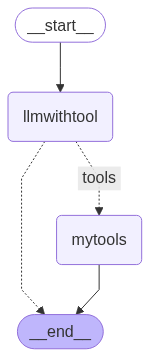

In [87]:
from IPython.display import Image, display
display(Image(app2.get_graph().draw_mermaid_png()))

In [88]:
app2.invoke({"messages":["what is a weather in bengraluru?"]})

{'messages': [HumanMessage(content='what is a weather in bengraluru?', additional_kwargs={}, response_metadata={}, id='74d2a8d7-4530-4c25-a853-a9857aad2886'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'zy9fwfktg', 'function': {'arguments': '{"query":"weather in Bengaluru"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 79, 'prompt_tokens': 134, 'total_tokens': 213, 'completion_time': 0.385920184, 'prompt_time': 0.008565182, 'queue_time': 0.20109998099999998, 'total_time': 0.394485366}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--1de18bb1-e267-4ebb-8083-227fa5fc579f-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in Bengaluru'}, 'id': 'zy9fwfktg', 'type': 'tool_call'}], usage_metadata={'input_tokens': 134, 'output_tokens': 79, 'total_tokens': 213}),
  ToolMessage(content='the temperature is 25 degre

In [89]:
app2.invoke({"messages":["what is a weather in delhi?"]})

{'messages': [HumanMessage(content='what is a weather in delhi?', additional_kwargs={}, response_metadata={}, id='5806bc28-d32c-4ed6-944f-6c7ed5dd7837'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 't3wj71b0c', 'function': {'arguments': '{"query":"weather in Delhi"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 143, 'prompt_tokens': 132, 'total_tokens': 275, 'completion_time': 0.540702653, 'prompt_time': 0.008442404, 'queue_time': 0.203621948, 'total_time': 0.549145057}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--d8fc9dab-1b27-417e-a308-c59dbfcff154-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in Delhi'}, 'id': 't3wj71b0c', 'type': 'tool_call'}], usage_metadata={'input_tokens': 132, 'output_tokens': 143, 'total_tokens': 275}),
  ToolMessage(content='the temperature in delhi is 45 degrees celsius

In [90]:
app2.invoke({"messages":["hi how are you?"]})

{'messages': [HumanMessage(content='hi how are you?', additional_kwargs={}, response_metadata={}, id='b2a8f8e8-a3a6-45bc-aaa1-df3ad1e89ff5'),
  AIMessage(content="Hello! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you with whatever you need. How can I assist you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 104, 'prompt_tokens': 129, 'total_tokens': 233, 'completion_time': 0.431080325, 'prompt_time': 0.008360266, 'queue_time': 0.20404105, 'total_time': 0.439440591}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--56b238ca-4861-4e3f-a1b1-908f12f4cf8b-0', usage_metadata={'input_tokens': 129, 'output_tokens': 104, 'total_tokens': 233})]}